<a href="https://colab.research.google.com/github/Ekansh0801/90-DAYS-OF-MACHINE-LEARNING/blob/main/DAY_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

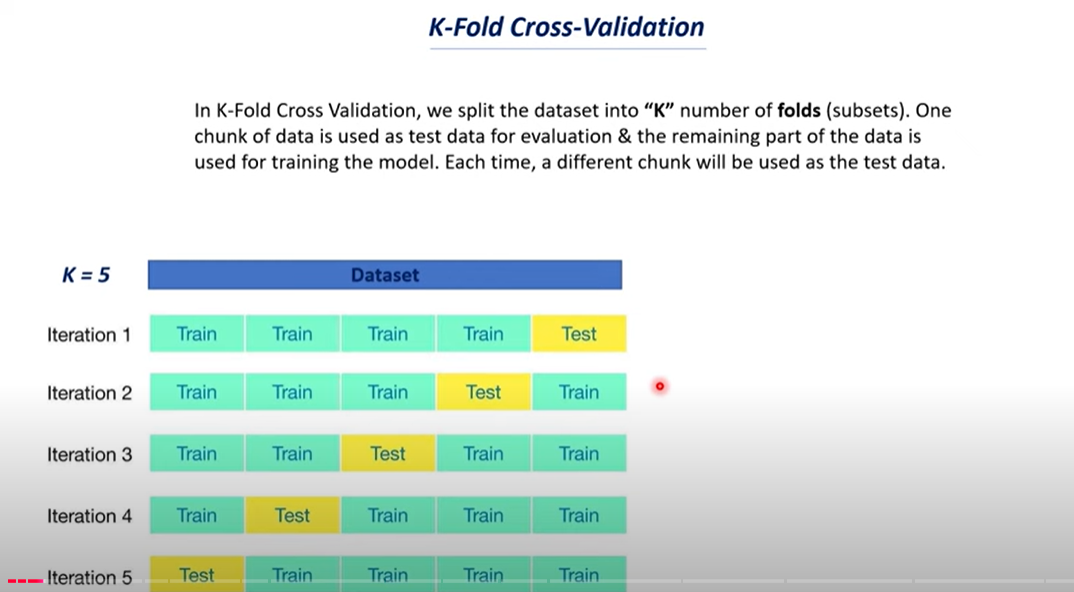

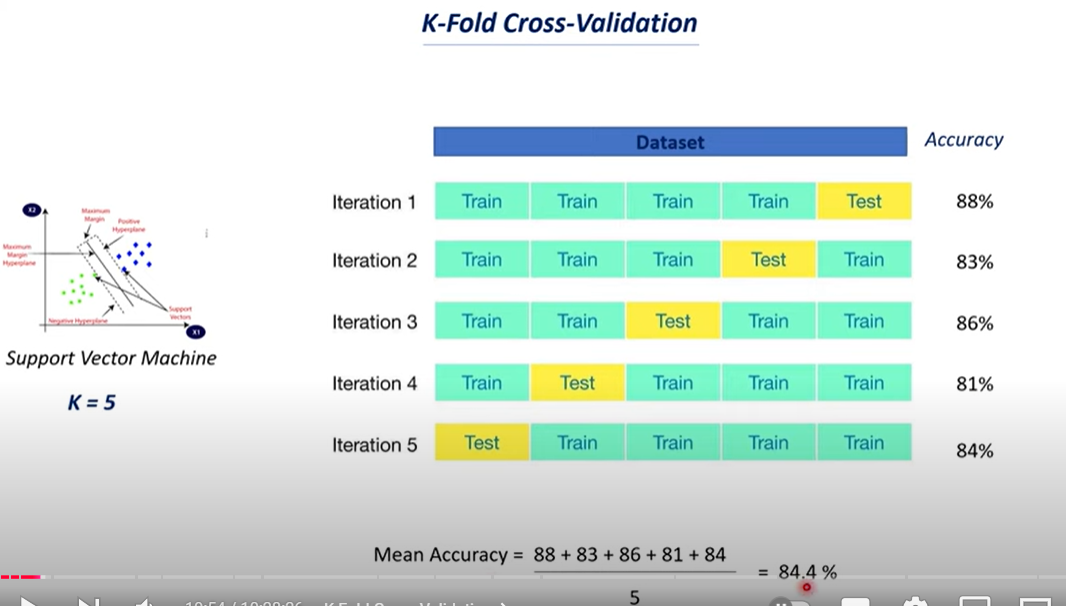

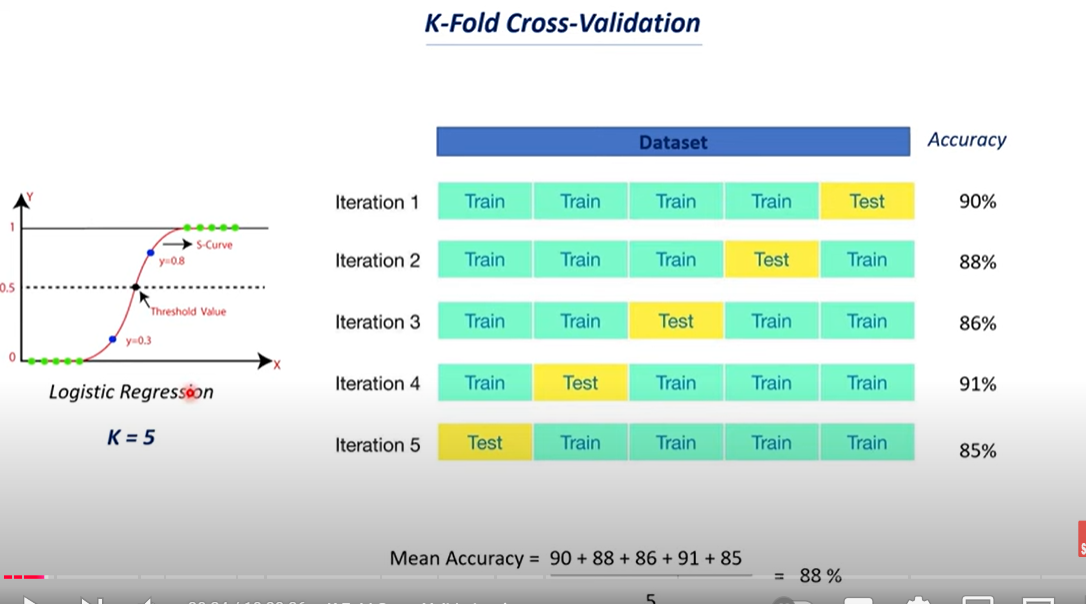

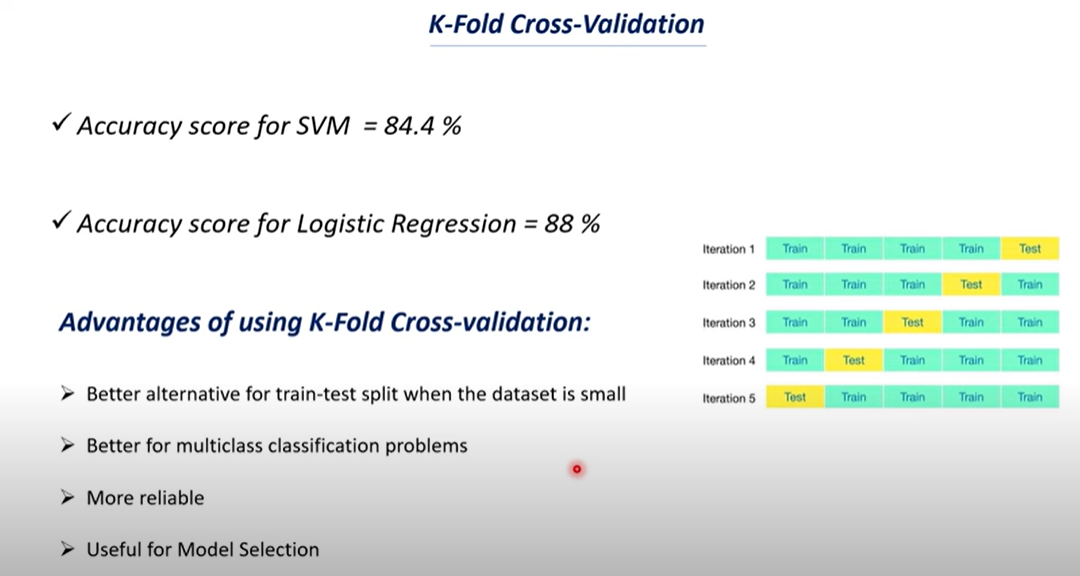

# Implementation of K - fold cross validation in python

### importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### importing models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Data Collection and preprocessing

In [3]:
# loading the csv data into pandas dataframe
heart_data = pd.read_csv('/content/heart.csv')

In [4]:
# printing first 5 rows of dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# number of rows and columns
heart_data.shape

(1025, 14)

In [6]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
# checking distribution of target variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


### 1 --> Defective heart
### 0 --> Healthy heart

### splitting features and target

In [9]:
X = heart_data.drop(columns='target',axis = 1)
Y = heart_data['target']

In [10]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [11]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


### Train Test Split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify=Y,random_state = 3)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


### comparing performance of models

In [26]:
# list of models

models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [42]:
def compare_models_train_test():
  for model in models:
    model.fit(X_train,Y_train)

    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(Y_test,test_data_prediction)

    print('Accuracy of model is : ', round(accuracy * 100 , 2))

In [43]:
compare_models_train_test()

Accuracy of model is :  83.9
Accuracy of model is :  82.44
Accuracy of model is :  75.61
Accuracy of model is :  100.0


### Cross Validation

#### Logistic Regression

In [36]:
cv_scores_lr = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)
mean_accuracy_lr = sum(cv_scores_lr) / len(cv_scores_lr)
mean_accuracy_lr = mean_accuracy_lr * 100
mean_accuracy_lr = round(mean_accuracy_lr,2)
print(mean_accuracy_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

84.98


### Support vector classifier

In [38]:
cv_scores_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)
mean_accuracy_svc = sum(cv_scores_svc) / len(cv_scores_svc)
mean_accuracy_svc = mean_accuracy_svc * 100
mean_accuracy_svc = round(mean_accuracy_svc,2)
print(mean_accuracy_svc)

84.29


In [39]:
# writing a function to compare models
# list of models

models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [40]:
def compare_models_cross_validation():
  for model in models:
    cv_score = cross_val_score(model,X,Y,cv = 5)
    mean_accuracy = sum(cv_score) / len(cv_score)
    mean_accuracy = mean_accuracy * 100
    mean_accuracy = round(mean_accuracy,2)
    print("cv score of ", model , " = ",mean_accuracy)

In [41]:
compare_models_cross_validation()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

cv score of  LogisticRegression(max_iter=1000)  =  84.98
cv score of  SVC(kernel='linear')  =  84.29
cv score of  KNeighborsClassifier()  =  74.73
cv score of  RandomForestClassifier()  =  99.71
